In [ ]:
!pip install pandas
!pip install matplotlib
!pip install np

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import np

dataset = pd.read_csv('adult.csv')

In [134]:
dataset['native-country'].fillna(dataset['native-country'].mode()[0], inplace=True)
dataset = dataset.replace("?", np.nan).dropna()

# For each of the categorical variables, construct a bar chart of the variable, with an overlay of the target variable.

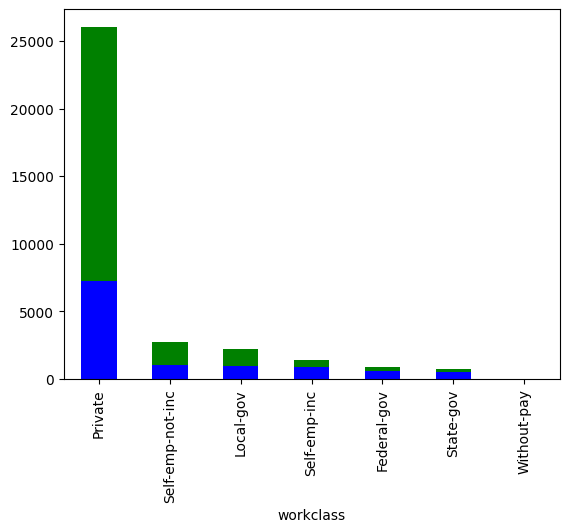

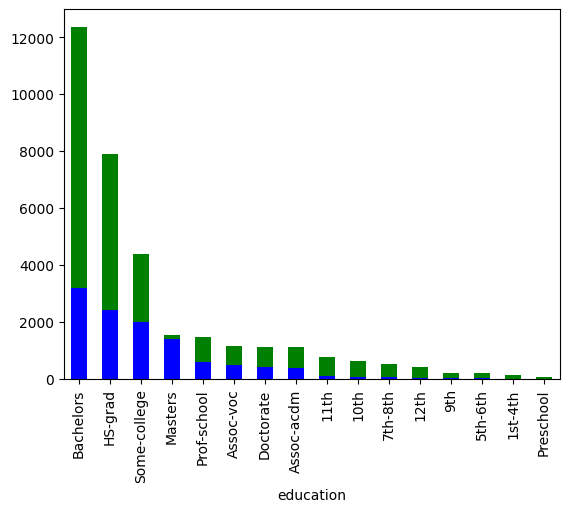

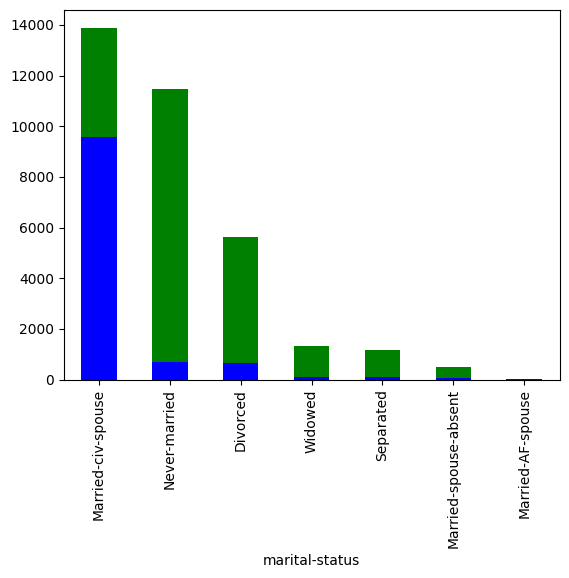

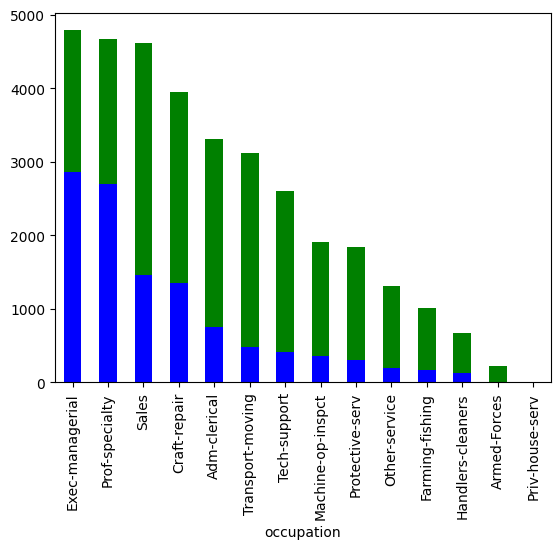

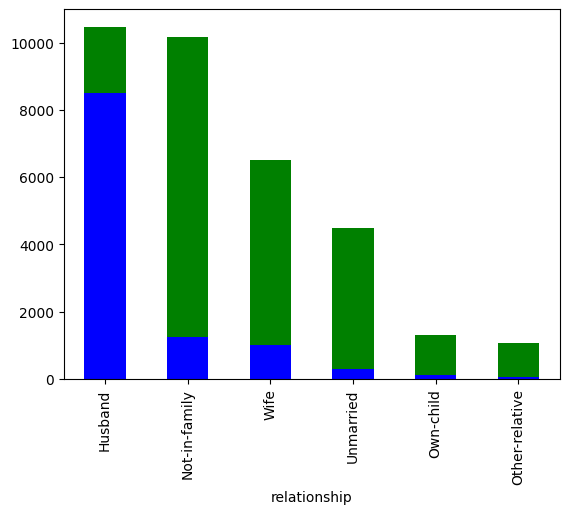

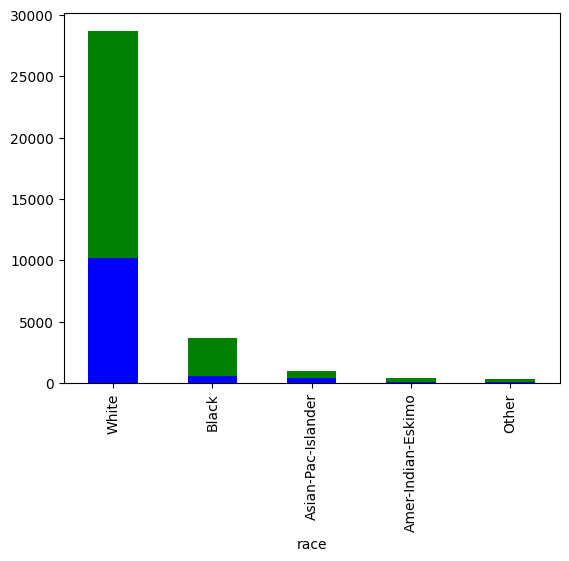

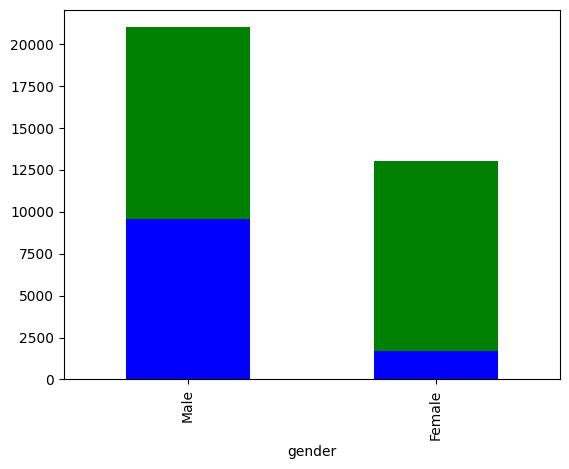

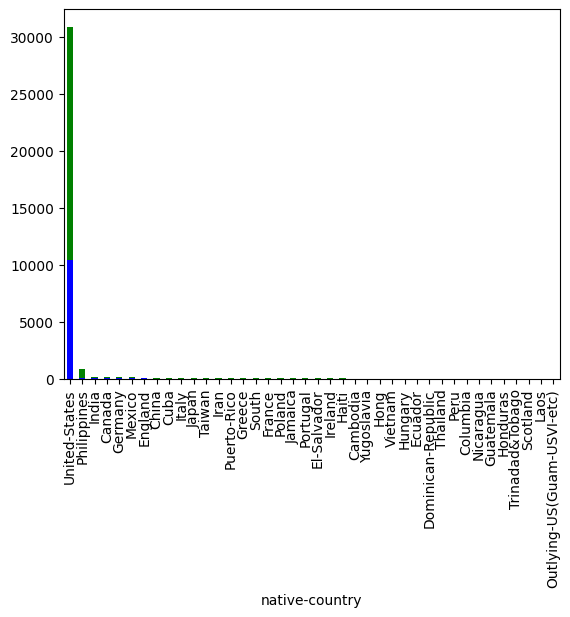

In [144]:
catagoricalData = dataset.select_dtypes(include=['object']).copy()

for column in catagoricalData:
    if column == "income":
        continue

    less50kData = catagoricalData[catagoricalData['income'] == '<=50K']
    more50kData = catagoricalData[catagoricalData['income'] == '>50K']

    less50kData[column].value_counts().plot(kind="bar", color='green', grid=False)
    more50kData[column].value_counts().plot(kind="bar", color='blue', grid=False)
    plt.show()



In [ ]:
numericalData = dataset.select_dtypes(include=['int64']).copy()
# include income column


In [139]:
# Find max min average sd for each columns
for column in numericalData:
    print(numericalData[column].describe())

count    45222.000000
mean        38.547941
std         13.217870
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64
count    4.522200e+04
mean     1.897347e+05
std      1.056392e+05
min      1.349200e+04
25%      1.173882e+05
50%      1.783160e+05
75%      2.379260e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64
count    45222.000000
mean        10.118460
std          2.552881
min          1.000000
25%          9.000000
50%         10.000000
75%         13.000000
max         16.000000
Name: educational-num, dtype: float64
count    45222.000000
mean      1101.430344
std       7506.430084
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64
count    45222.000000
mean        88.595418
std        404.956092
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356

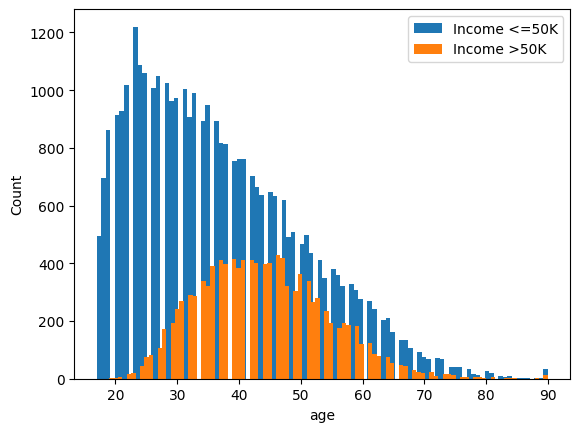

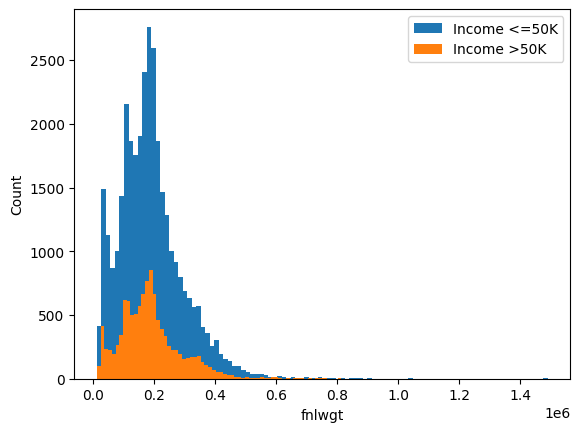

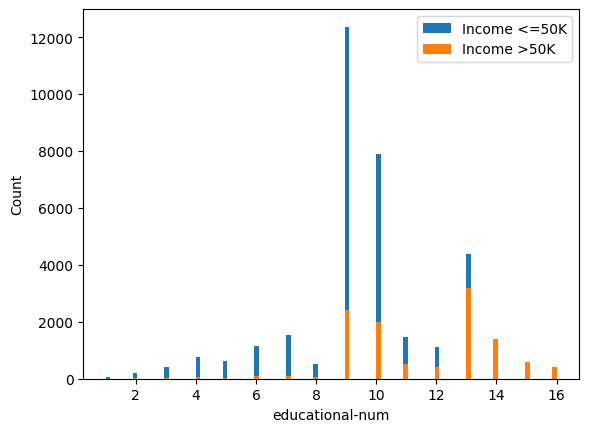

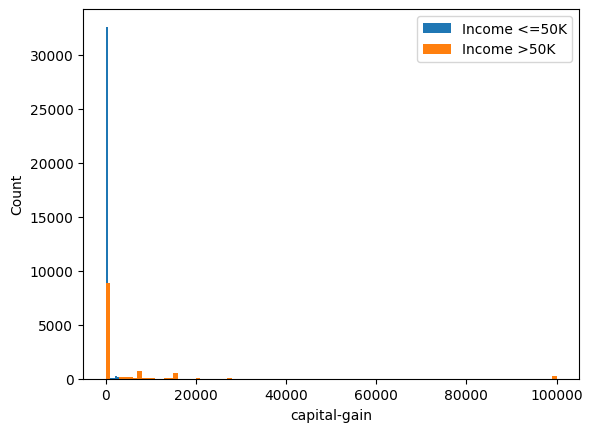

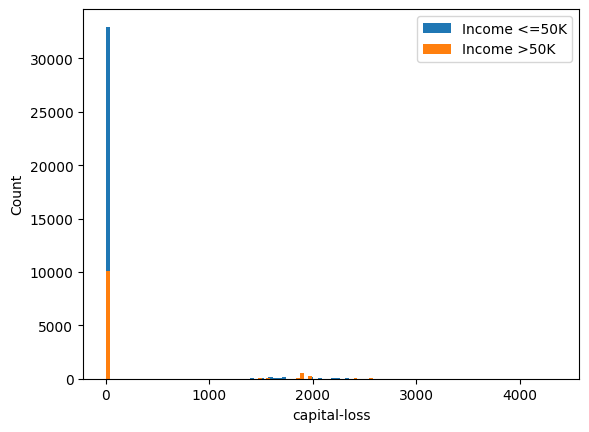

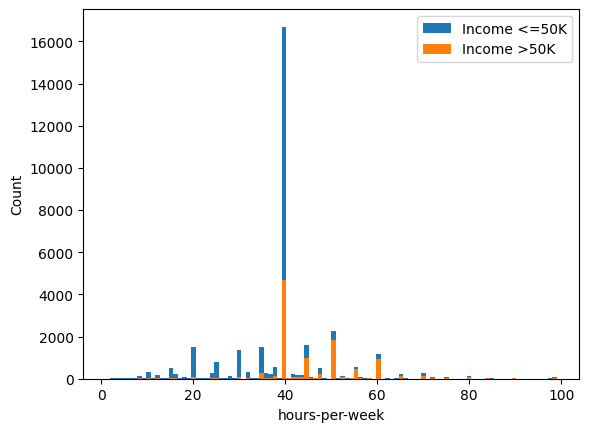

In [140]:
numericalData = dataset.select_dtypes(include=['int64']).copy()
numericalData['income'] = dataset['income']

doneList = []
for column in numericalData:
    if column == "income":
        continue
    
    # Aggregrate by income >50k and column
    less50kData = numericalData[numericalData['income'] == '<=50K']
    more50kData = numericalData[numericalData['income'] == '>50K']
    # Plot overlay histrogram
    plt.hist(less50kData[column],bins=100)
    plt.hist(more50kData[column],bins=100)
    

    # plt.hist([more50kData[column],less50kData[column]],bins=100)

    # Plot
    # plt.hist([aggregratedLess.age], bins=10, stacked=True)
    plt.legend(['Income <=50K', 'Income >50K'])
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

    # break

    doneList.append(column)

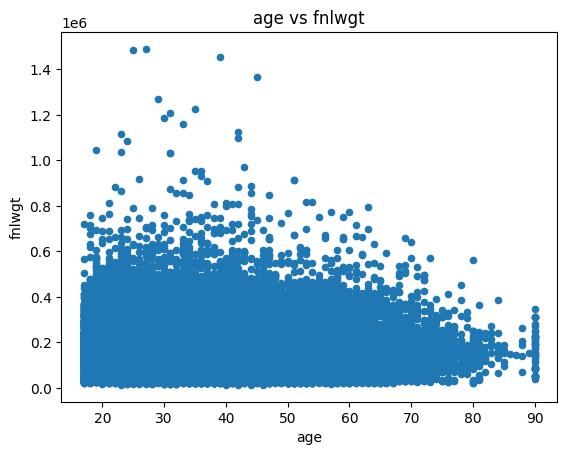

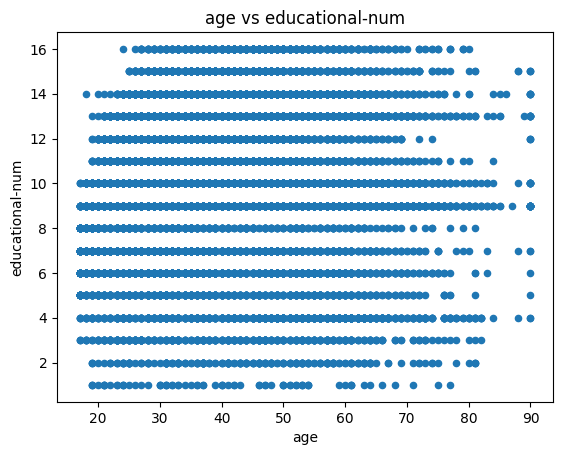

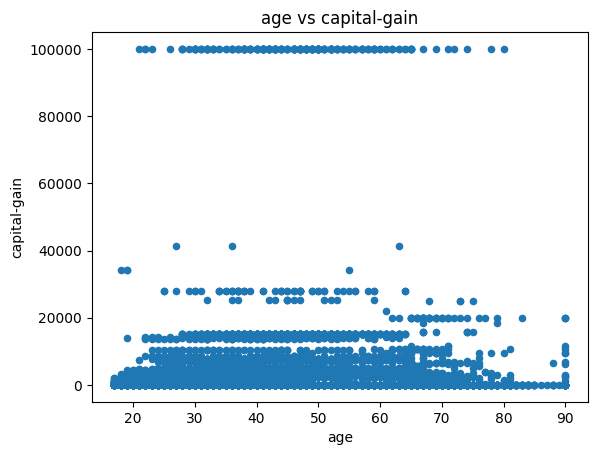

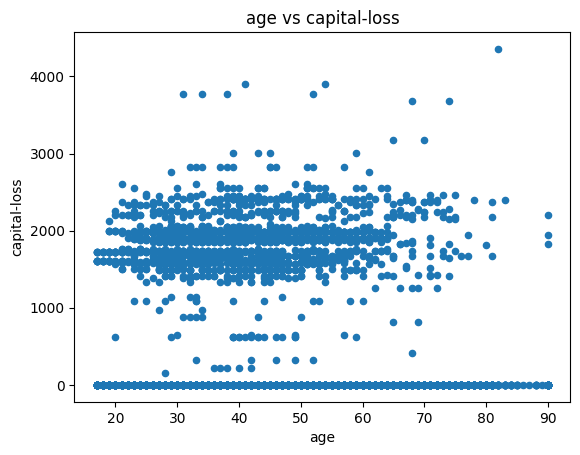

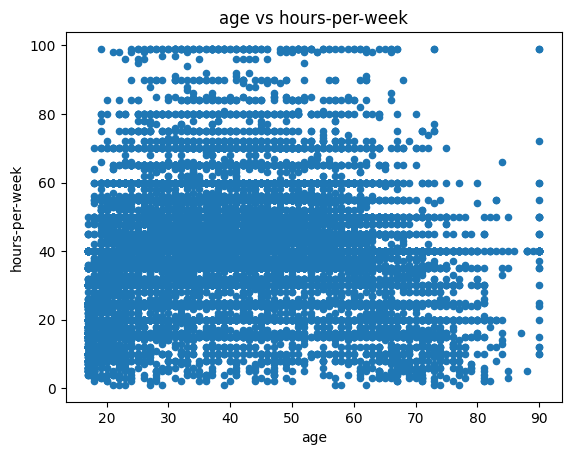

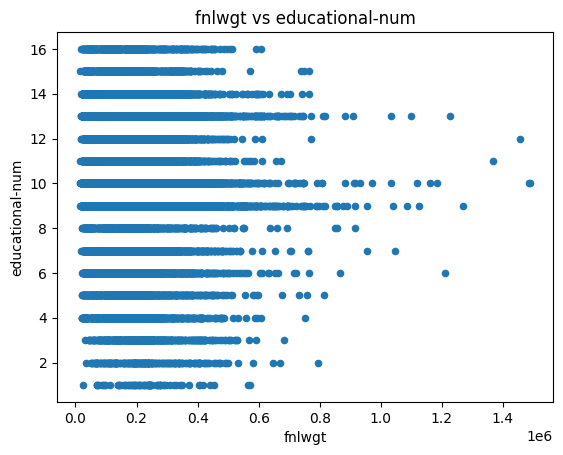

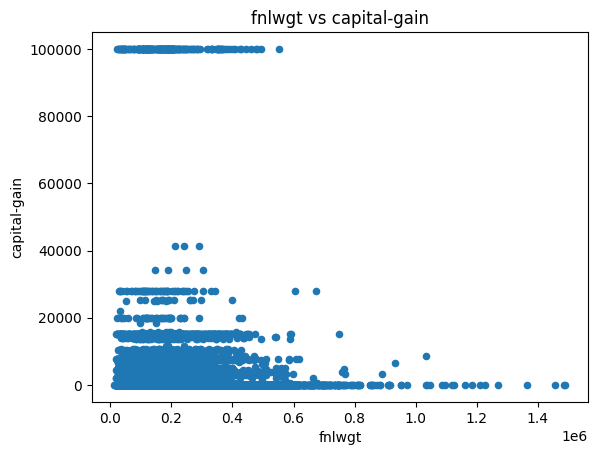

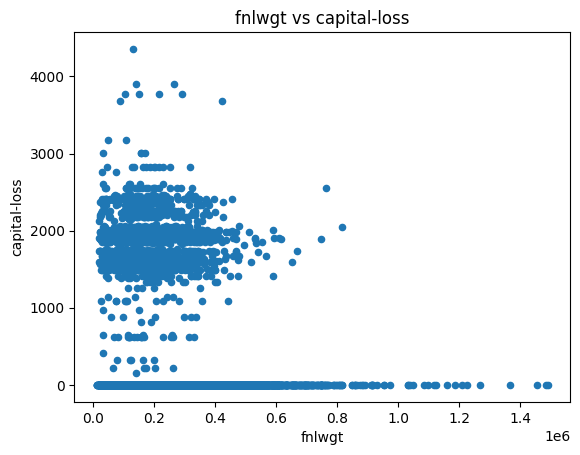

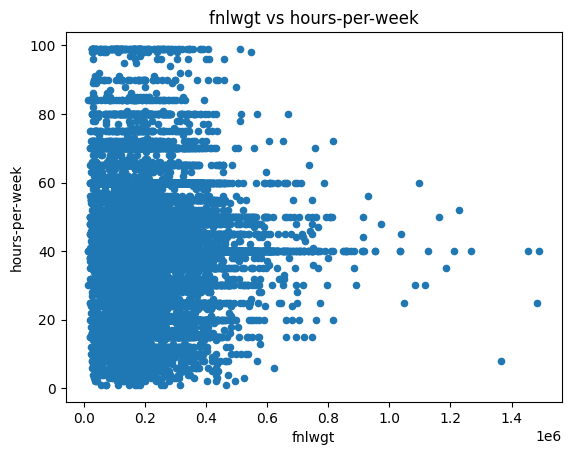

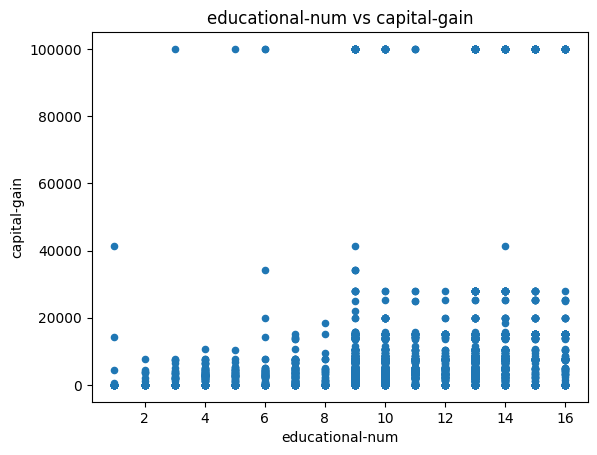

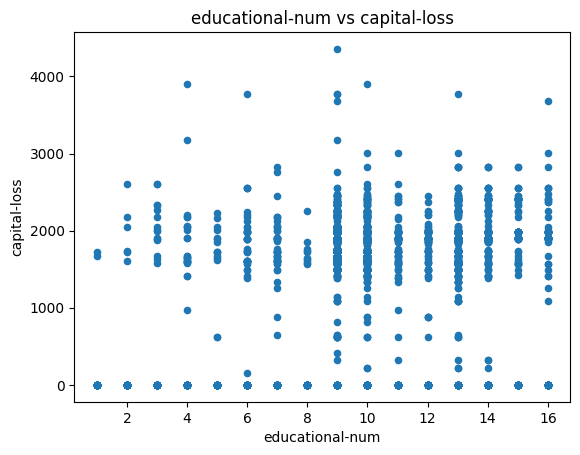

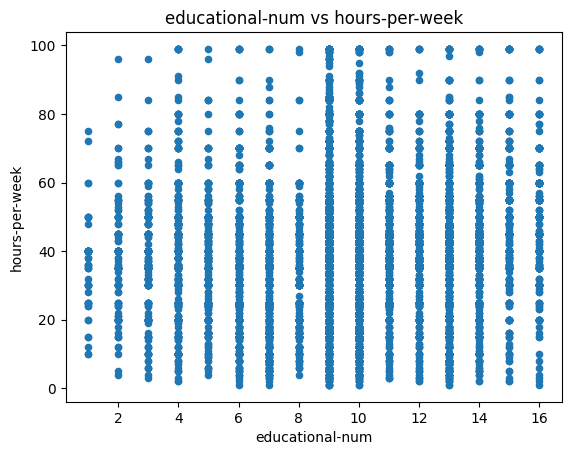

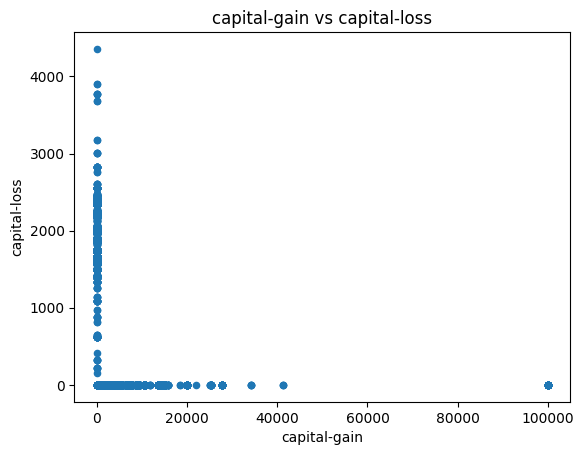

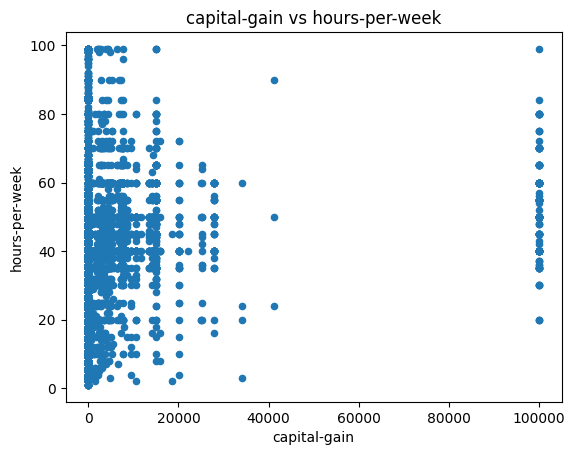

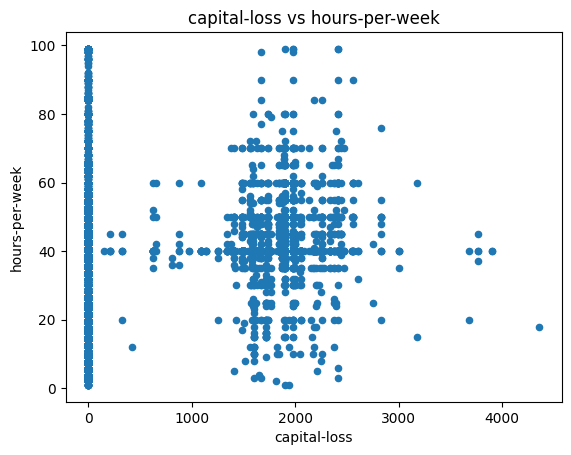

In [143]:
numericalData = dataset.select_dtypes(include=['int64']).copy()

doneColumns = []
for colX in numericalData:
    for colY in numericalData:
        if colX == colY or colY in doneColumns:
            continue
        numericalData.plot.scatter(x=colX, y=colY)
        doneColumns.append(colX)
        plt.title(colX + " vs " + colY)
        plt.show()
